# Scikit-Learn Python Library


***

This notebook is a overview of the [sckit-learn Python libray](https://scikit-learn.org/stable/): a free software machine learning library for the [Python](https://www.python.org/) programming language. 
It also supports supervised and unsupervised learning and provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

<br>

## An introduction to machine learning with scikit-learn
https://scikit-learn.org/stable/tutorial/basic/tutorial.html

In [1]:
import sklearn.datasets as datasets

In [2]:
iris = datasets.load_iris()

In [3]:
digits = datasets.load_digits()

In [4]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
from sklearn import svm

In [8]:
clf = svm.SVC(gamma=0.001, C=100.)

In [9]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [10]:
clf.predict(digits.data[-1:])

array([8])

<br>

## Different Types of Scikit-Learn Algorithms

***

The two main categories of Machine Learning Algorithms are Supervised learning and Unsupervised learning.

### Supervised Learning
Supervised learning is where an algorithm is trained on input data that has been labeled for a particular output based on example input-output pairs that exist in the algorithm.
This basically means the computer is already aware of what the possible output will be of the raw input being processed.

<img src="https://cdn.datafloq.com/cms/2018/01/23/supervised-learning.png" alt="Supervised-Learning" width="600">

Click [here](https://datafloq.com/read/machine-learning-explained-understanding-learning/4478) for more information about the image.

### UnSupervised Learning
Unsupervised learning uses algorithms to analyze raw input data, without any pre-assigned labels. It works by discovering patterns and differences in the data set.

<img src="https://www.gong-jj.com/images/ml-unsup/unsup_header.png" alt="Supervised-Learning" width="600">

Click [here](https://www.gong-jj.com/ul/) for more information about the image.

<br>

## Supervised Learning Algorithms

***

## Classification: Analysis on The Wine Quality Data Set 
![Wine Quality Data Set](https://archive.ics.uci.edu/ml/assets/MLimages/Large186.jpg)

[Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) available at the [UC Irvine Machine Learning](https://archive.ics.uci.edu/ml/index.php)
***

## Setup

In [11]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [12]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

### The Red Wine Quality Dataset

In [13]:
# Load the Wine Quality data set from a URL.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [14]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [15]:
# Have a look at the data.
df.shape

(1599, 12)

In [16]:
# Summary statistics.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
# Feature Relationships
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [19]:
# Assign Specific Labels to Wine Quality
bins = (0, 4, 7, 10)
labels = ["bad", "medium", "good"]
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

In [20]:
df['quality'].value_counts()

medium    1518
bad         63
good        18
Name: quality, dtype: int64

### Visualise Data Set

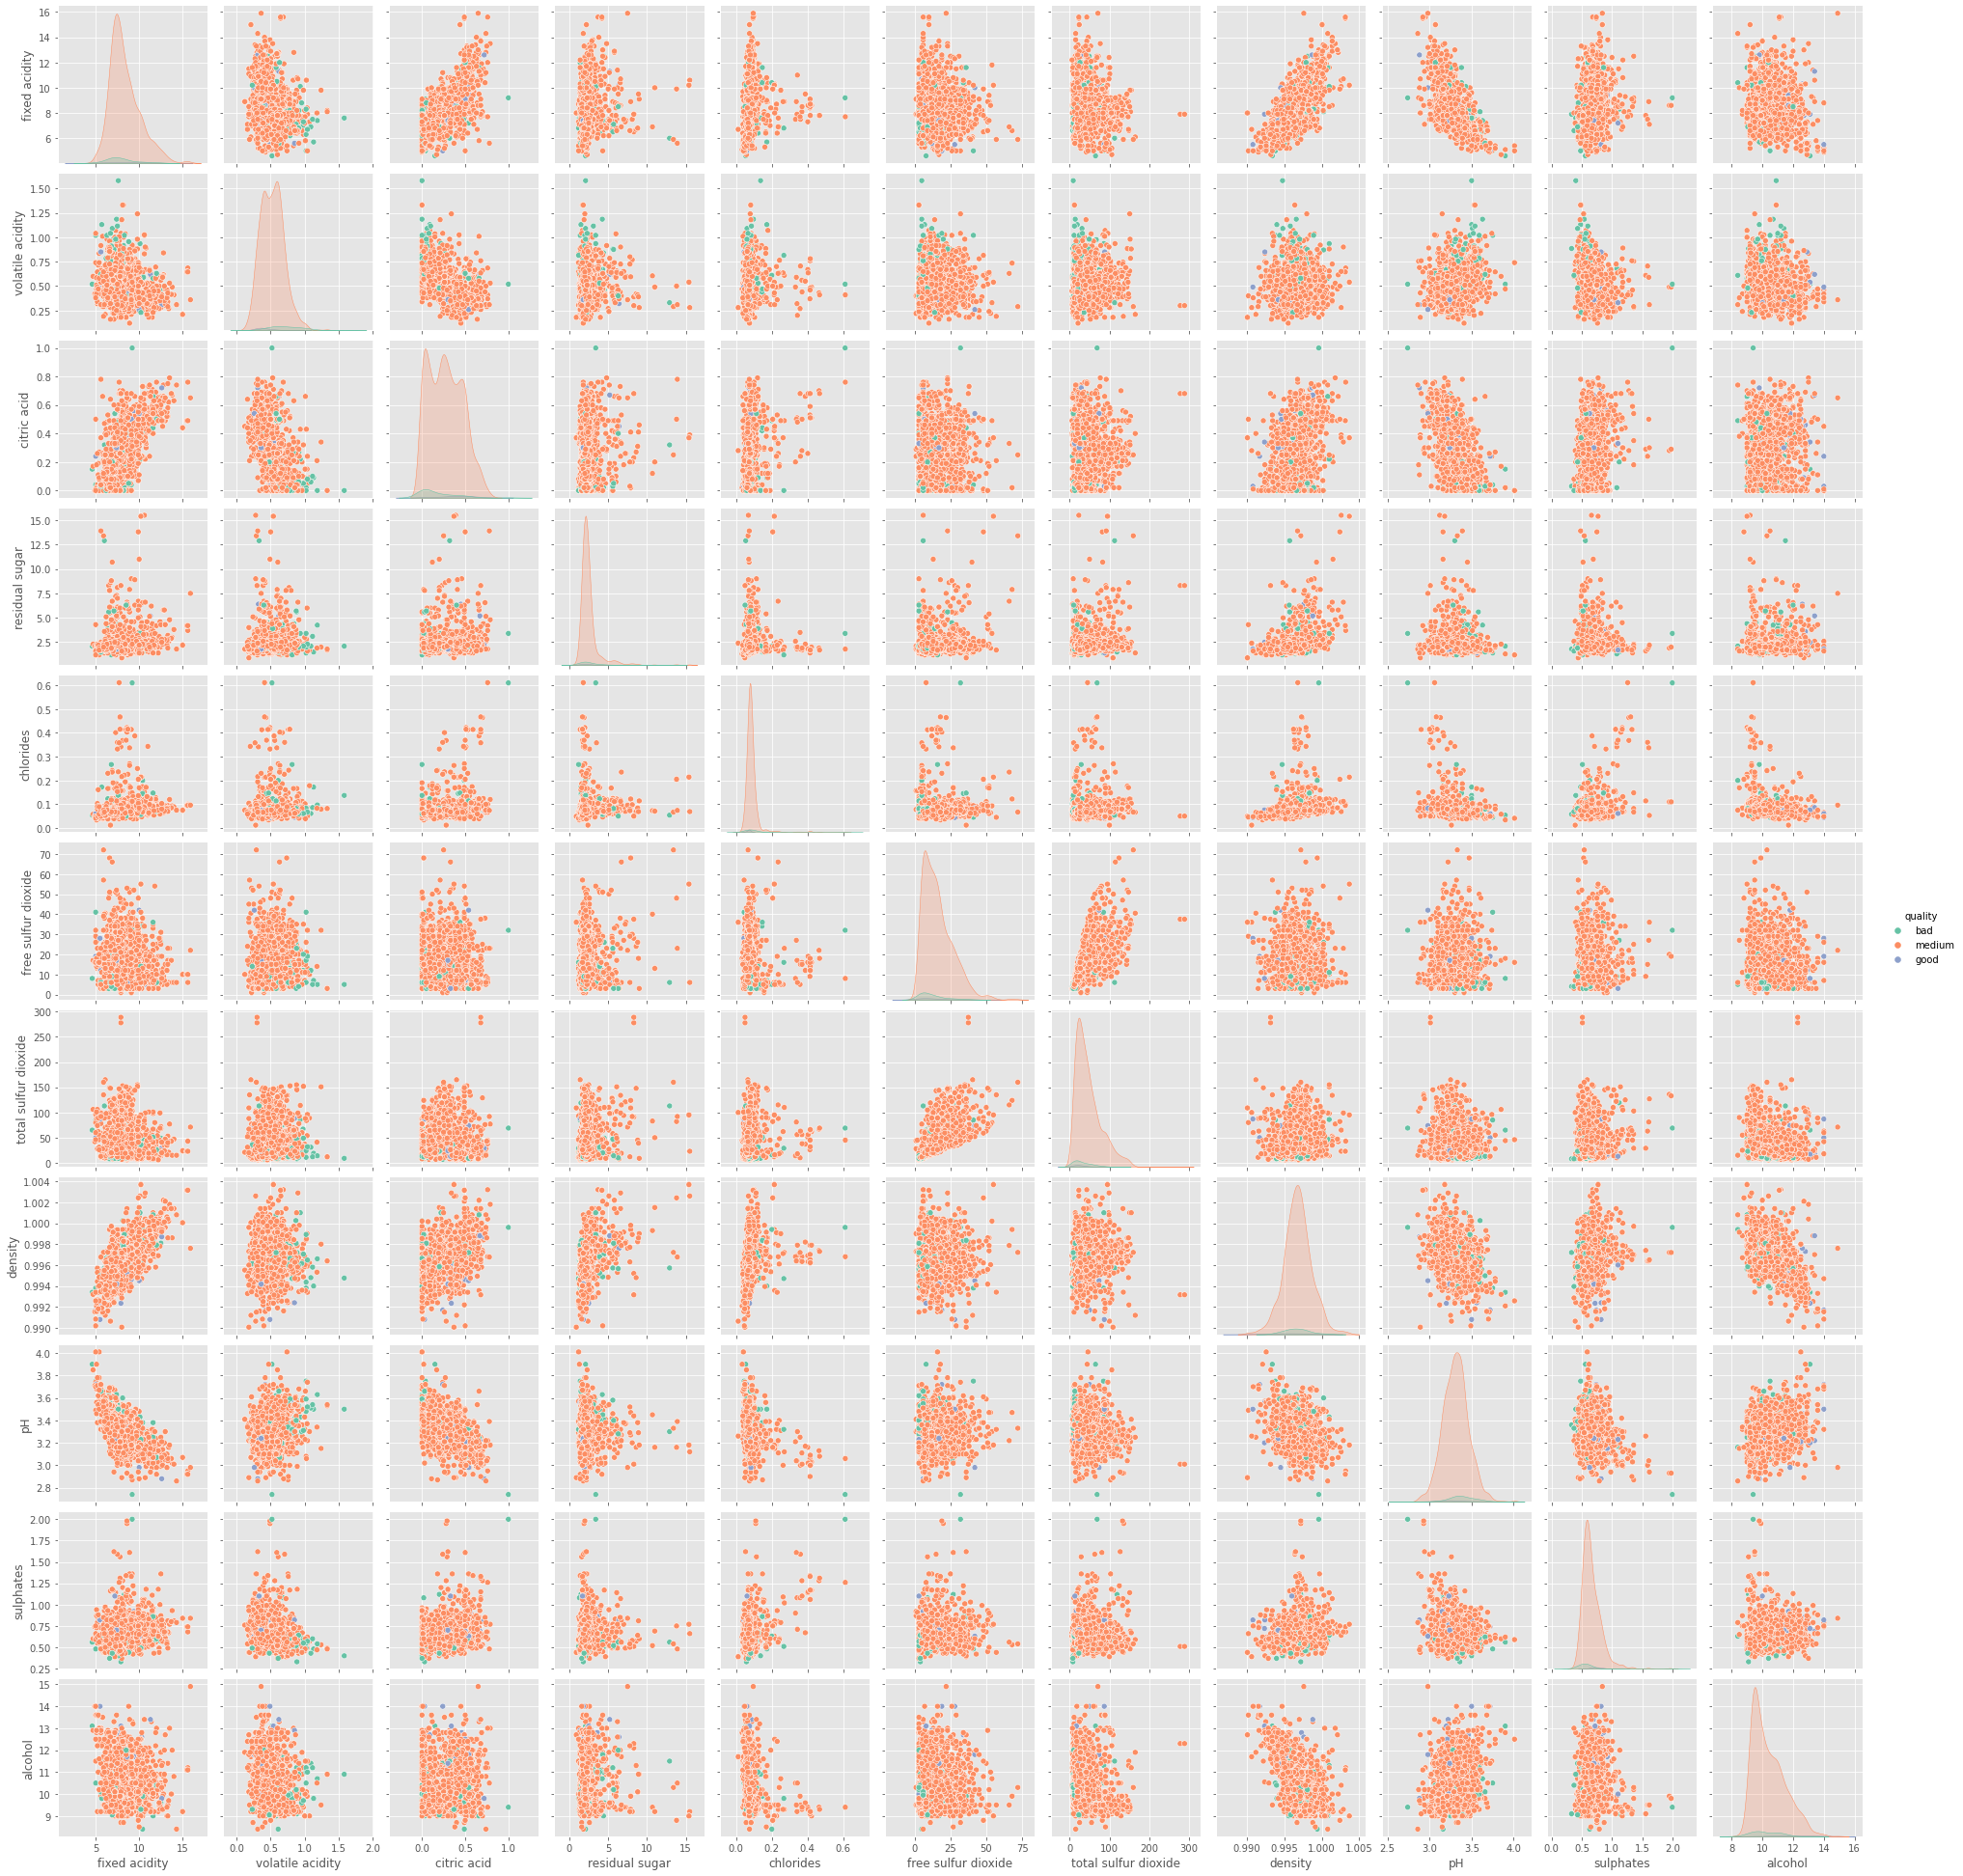

In [21]:
# Scatter plots and kdes.
sns.pairplot(df, hue='quality', palette = "Set2");

### Two Dimensions Data Representation

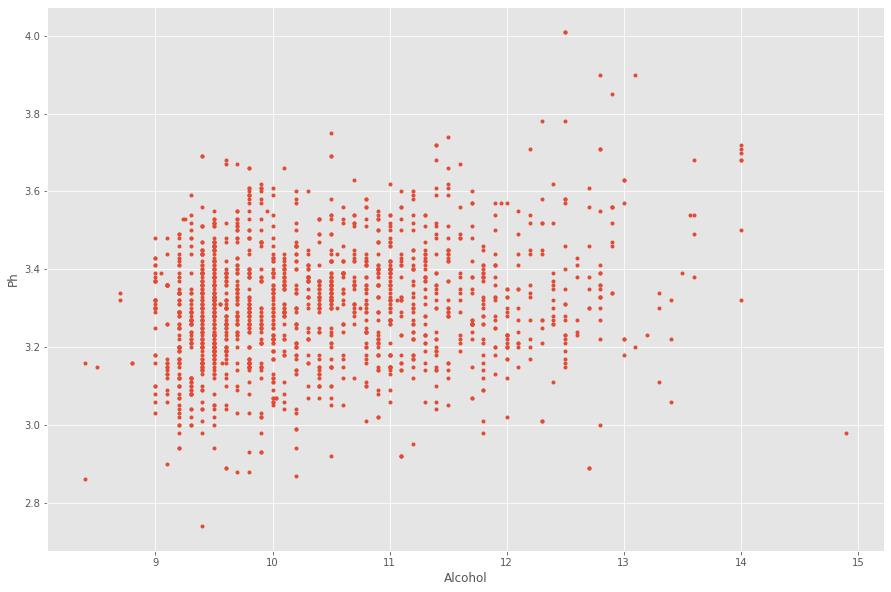

In [22]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['alcohol'], df['pH'], '.')

# Set axis labels.
ax.set_xlabel('Alcohol');
ax.set_ylabel('Ph');

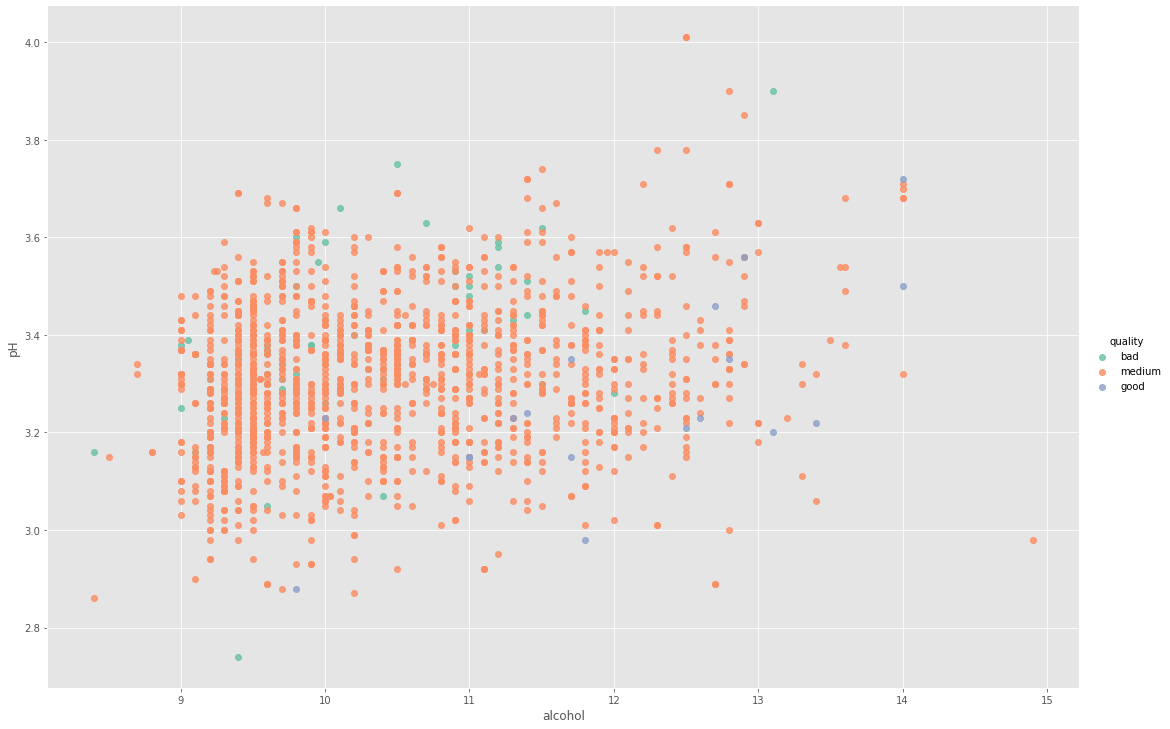

In [23]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x='alcohol', y='pH', hue='quality', data=df, fit_reg=False, height=10, aspect=1.5, palette="Set2")

<AxesSubplot:xlabel='quality', ylabel='count'>

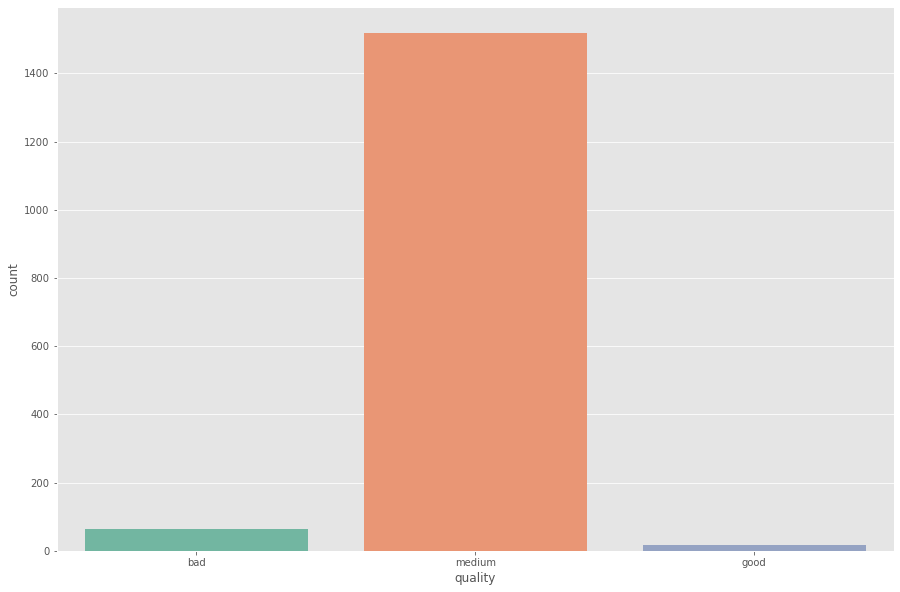

In [24]:
# Count Plot 
sns.countplot(x='quality',data=df, palette="Set2")

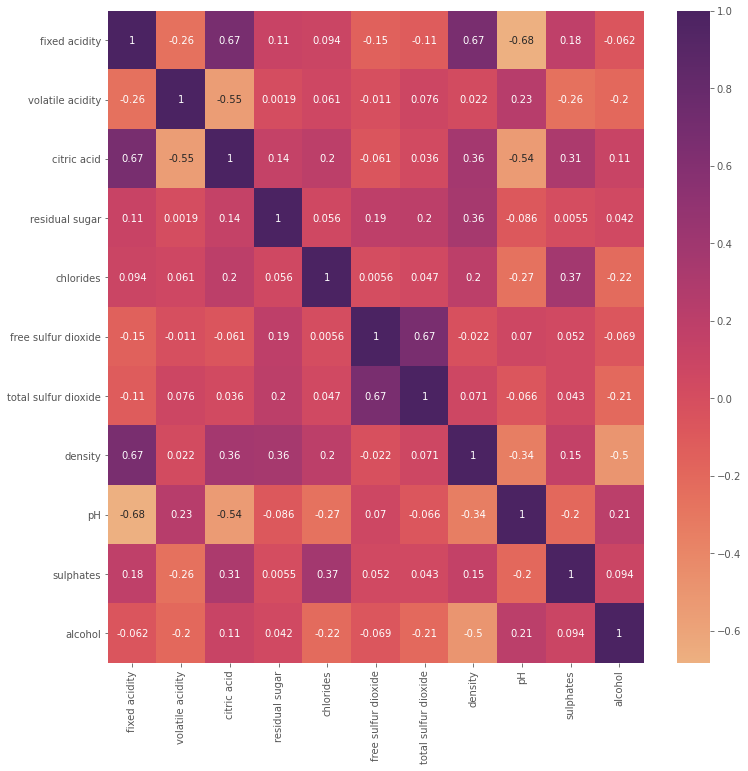

In [25]:
# Heatmap Visulation Dataset
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),annot=True,cmap="flare")
plt.show()

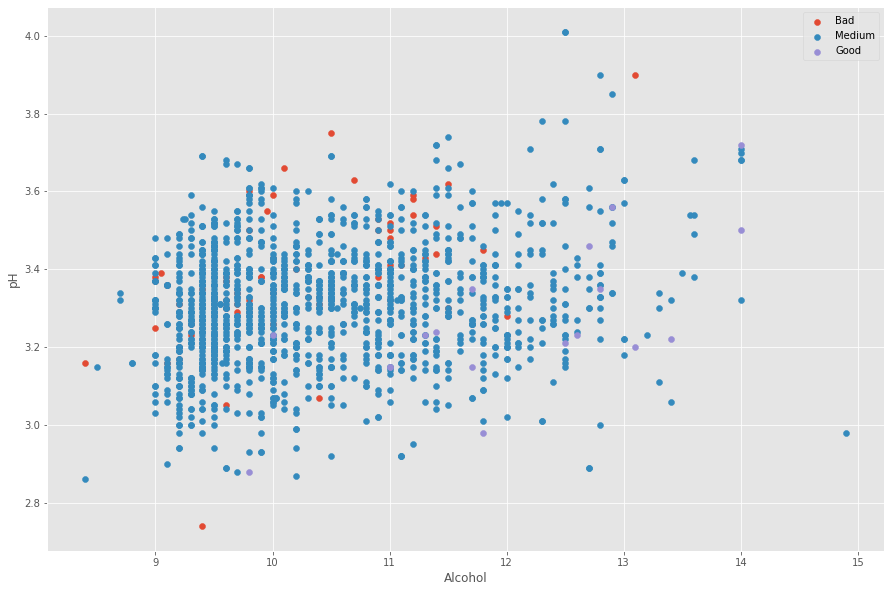

In [26]:
# Segregate the data.
bad = df[df['quality'] == 'bad']
medium = df[df['quality'] == 'medium']
good = df[df['quality'] == 'good']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(bad['alcohol'], bad['pH'], label='Bad')
ax.scatter(medium['alcohol'], medium['pH'], label='Medium')
ax.scatter(good['alcohol'], good['pH'], label='Good')


# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

In [27]:
# How the segregation works.
df['quality'] == 'bad'

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: quality, Length: 1599, dtype: bool

In [28]:
df[df['quality'] == 'bad'].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,bad
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.9940,3.50,0.48,9.8,bad
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,bad
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,bad
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.9976,3.31,0.53,9.2,bad


### Using groupby()

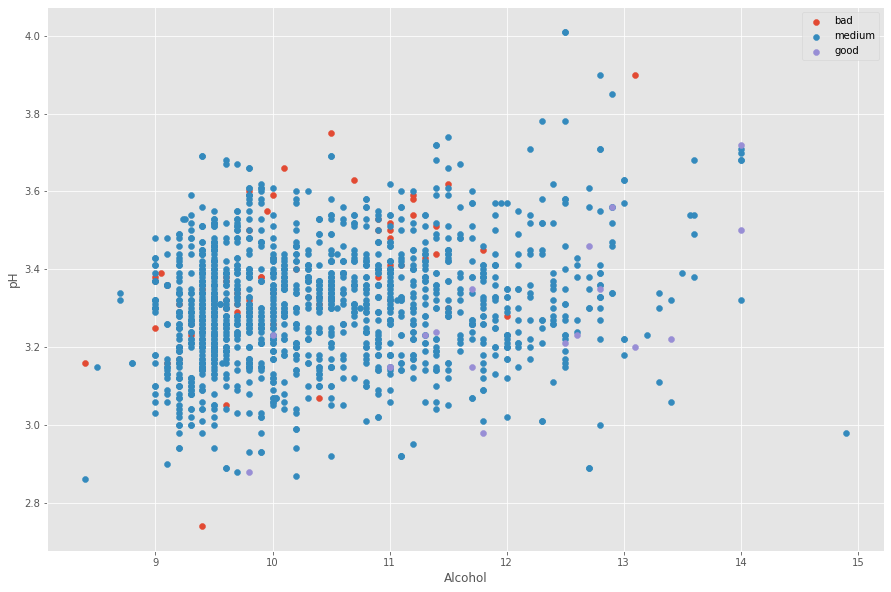

In [29]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for quality, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['pH'], label=quality)

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

In [30]:
# Group by typically takes a categorical variable.
x = df.groupby('quality')
x

In [31]:
# Pivot tables.
x.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873
medium,8.335310,0.520909,0.273590,2.532279,0.087349,16.063900,47.121212,0.996767,3.308603,0.659585,10.411759
good,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [32]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j is:\n{j[:3]}")
    print()


i is: 'bad'
j is:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
18            7.4              0.59         0.08             4.4      0.086   
38            5.7              1.13         0.09             1.5      0.172   
41            8.8              0.61         0.30             2.8      0.088   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
18                  6.0                  29.0   0.9974  3.38       0.50   
38                  7.0                  19.0   0.9940  3.50       0.48   
41                 17.0                  46.0   0.9976  3.26       0.51   

    alcohol quality  
18      9.0     bad  
38      9.8     bad  
41      9.3     bad  


i is: 'medium'
j is:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8  

## Test and Train Split

In [33]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [34]:
# Show some training data.
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1067,11.1,0.310,0.53,2.20,0.060,3.0,10.0,0.99572,3.02,0.83,10.9,medium
840,11.1,0.420,0.47,2.65,0.085,9.0,34.0,0.99736,3.24,0.77,12.1,medium
792,7.1,0.610,0.02,2.50,0.081,17.0,87.0,0.99745,3.48,0.60,9.7,medium
349,9.1,0.785,0.00,2.60,0.093,11.0,28.0,0.99940,3.36,0.86,9.4,medium
1501,7.8,0.820,0.29,4.30,0.083,21.0,64.0,0.99642,3.16,0.53,9.4,medium


In [35]:
# The indices of the train array.
train.index

Int64Index([1067,  840,  792,  349, 1501,  797,  727,  100,  118,  893,
            ...
             639,  617, 1310,  978,  892,  316, 1213, 1271,  671,  994],
           dtype='int64', length=1199)

In [36]:
# Show some testing data.
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
491,9.2,0.41,0.50,2.5,0.055,12.0,25.0,0.99520,3.34,0.79,13.30,medium
1576,8.0,0.30,0.63,1.6,0.081,16.0,29.0,0.99588,3.30,0.78,10.80,medium
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,medium
1250,7.1,0.60,0.01,2.3,0.079,24.0,37.0,0.99514,3.40,0.61,10.90,medium
1416,10.0,0.32,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.60,medium


In [37]:
test.index.size

400

## Two Dimensions: Test Train Split

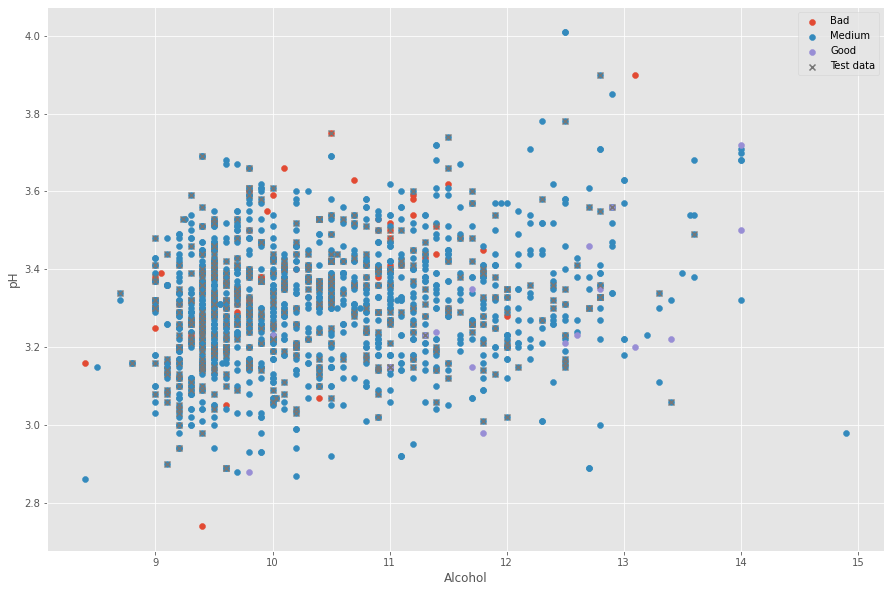

In [38]:
# Segregate the data.
bad = df[df['quality'] == 'bad']
medium = df[df['quality'] == 'medium']
good = df[df['quality'] == 'good']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(bad['alcohol'], bad['pH'], marker='o' , label='Bad')
ax.scatter(medium['alcohol'], medium['pH'], marker='o', label='Medium')
ax.scatter(good['alcohol'], good['pH'], marker='o', label='Good')

# Scatter plot for testing data.
ax.scatter(test['alcohol'], test['pH'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

## Two Dimensions: Inputs and outputs

In [39]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['alcohol', 'pH']], train['quality']

In [40]:
# Peek at the inputs.
inputs.head()

,alcohol,pH
1067,10.9,3.02
840,12.1,3.24
792,9.7,3.48
349,9.4,3.36
1501,9.4,3.16


In [41]:
# Peek at the outputs.
outputs.head()

1067    medium
840     medium
792     medium
349     medium
1501    medium
Name: quality, dtype: category
Categories (3, object): ['bad' < 'medium' < 'good']

## Two Dimensions: Logistic regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
***

In [42]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [43]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['alcohol', 'pH']])

In [44]:
# Eyeball the misclassifications.
predictions == test['quality']

491     True
1576    True
1555    True
1250    True
1416    True
        ... 
386     True
687     True
1005    True
966     True
789     True
Name: quality, Length: 400, dtype: bool

In [45]:
# What proportion were correct?
lre.score(test[['alcohol', 'pH']], test['quality'])

0.9525

## Two Dimensions: Misclassified

In [46]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

<ipython-input-46-7f2fd5111565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted
491,9.2,0.41,0.50,2.5,0.055,12.0,25.0,0.99520,3.34,0.79,13.30,medium,medium
1576,8.0,0.30,0.63,1.6,0.081,16.0,29.0,0.99588,3.30,0.78,10.80,medium,medium
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,medium,medium
1250,7.1,0.60,0.01,2.3,0.079,24.0,37.0,0.99514,3.40,0.61,10.90,medium,medium
1416,10.0,0.32,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.60,medium,medium


In [47]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['quality']]
misclass

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted
1189,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6,bad,medium
1233,10.2,0.230,0.37,2.2,0.057,14.0,36.0,0.99614,3.23,0.49,9.3,bad,medium
703,7.5,0.380,0.48,2.6,0.073,22.0,84.0,0.99720,3.32,0.70,9.6,bad,medium
1293,7.5,0.755,0.00,1.9,0.084,6.0,12.0,0.99672,3.34,0.49,9.7,bad,medium
199,6.9,1.090,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,bad,medium
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,bad,medium
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.3,bad,medium
876,7.1,0.470,0.00,2.2,0.067,7.0,14.0,0.99517,3.40,0.58,10.9,bad,medium
1299,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,bad,medium
498,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,good,medium


In [48]:
# Eyeball the descriptive statistics for the species.
train.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
bad,7.882609,0.714783,0.180217,2.772826,0.095478,11.217391,34.260870,0.996825,3.381522,0.613043,10.221739
medium,8.343360,0.521174,0.273219,2.514116,0.086698,16.061566,46.305629,0.996730,3.309974,0.659314,10.439167
good,8.518750,0.430625,0.387500,2.612500,0.069125,13.687500,34.812500,0.995119,3.276875,0.775625,12.212500


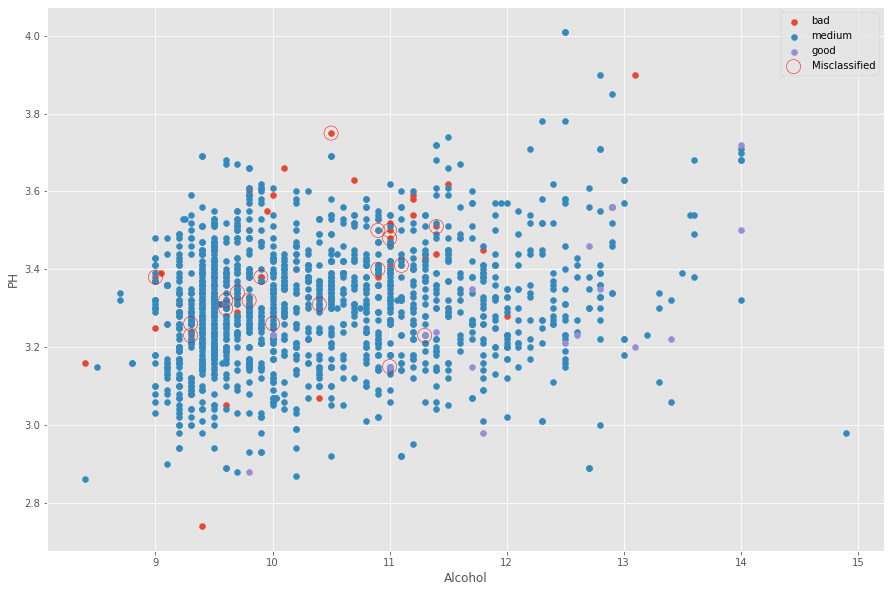

In [49]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for quality, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['pH'], label=quality)
    
# Plot misclassified.
ax.scatter(misclass['alcohol'], misclass['pH'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('PH')
ax.legend();

## Seperating Bad Quality

From [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression):    ${L} = \log(b) \frac{p}{1-p} = \beta_0 + \beta_1 x_{1} + \beta_0 + \beta_2 x_{2}$


***

In [50]:
# Give the inputs and outputs convenient names.
inputs = train[['alcohol', 'pH']]

# Set 'versicolor' and 'virginica' to 'other'.
outputs = train['quality'].apply(lambda x: x if x == 'bad' else 'other')

# Eyeball outputs
outputs.unique()

array(['other', 'bad'], dtype=object)

In [51]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [52]:
actual = test['quality'].apply(lambda x: x if x == 'bad' else 'other')

# What proportion were correct?
lre.score(test[['alcohol', 'pH']], actual)

0.9575

## Using All Possible Inputs
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
***

In [53]:
# Load the Wine Quality data set from a URL.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [54]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [55]:
# Use all eleven possible inputs.
inputs, outputs = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], train['quality']

In [56]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

C:\Users\kacper\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [57]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
predictions

array([6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6,
       5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5,
       6, 6, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6,
       5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 4, 6, 5, 5, 5,
       6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5,
       5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5,
       5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5,
       6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6,

In [58]:
# Eyeball the misclassifications.
(predictions == test['quality']).value_counts()

True     232
False    168
Name: quality, dtype: int64

In [59]:
# What proportion were correct?
lre.score(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], test['quality'])

0.58

## $\kappa$ Nearest Neighbours Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
***

In [60]:
# Load the Wine Quality data set from a URL.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [61]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [62]:
# Use all eleven possible inputs.
inputs, outputs = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], train['quality']

In [63]:
# Classifier.
knn = nei.KNeighborsClassifier()

In [64]:
# Fit.
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [65]:
# Test.
knn.score(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']],  test['quality'])

0.4425

In [66]:
# Predict.
predictions = lre.predict(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
(predictions == test['quality']).value_counts()

True     230
False    170
Name: quality, dtype: int64

In [67]:
# The score is just the accuracy in this case.
(predictions == test['quality']).value_counts(normalize=True)

True     0.575
False    0.425
Name: quality, dtype: float64

## Cross validation
https://scikit-learn.org/stable/modules/cross_validation.html
***

In [68]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], df['quality'])
scores

array([0.446875  , 0.475     , 0.4625    , 0.390625  , 0.43573668])

In [69]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.4421473354231975 	 Standard Deviation: 0.029022497910809644


In [106]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], df['quality'])
scores

KeyError: "None of [Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',\n       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',\n       'pH', 'sulphates', 'alcohol'],\n      dtype='object')] are in the [columns]"

In [71]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.5753722570532915 	 Standard Deviation: 0.027006623090518617


<br>

## Regression: Analysis on Forest Fire Data Set

![Forest Fire Data Set](https://archive.ics.uci.edu/ml/assets/MLimages/Large162.jpg)

[Forest Fire Data Set](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) available at the [UC Irvine Machine Learning](https://archive.ics.uci.edu/ml/index.php)

***

In [81]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

In [82]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (12, 8)

In [83]:
# Load the Forest Fire data set from a URL.
fires = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

In [84]:
# Display Data Attributes
fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [114]:
# Extract 2 columns 'ISI','temp' for pure and better showing
fires_df = fires[['ISI','temp']]

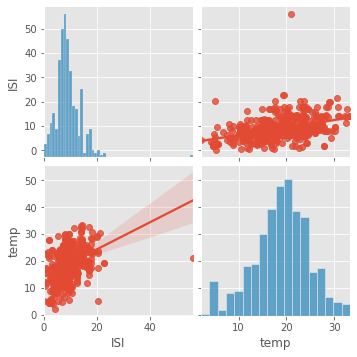

In [115]:
sns.pairplot(fires_df, kind="reg")

In [120]:
# Do regression on the temp and ISI arrays using numpy.
np.polyfit(fires_df['temp'], fires_df['ISI'], 1)

array([0.30960204, 3.17353842])

In [121]:
# Create variables with those values.
m_1, c = np.polyfit(fires_df['temp'], fires_df['ISI'], 1)
# Have a look at m and c.
m, c

(0.30960203972010575, 3.1735384152908384)

Text(0, 0.5, 'ISI')

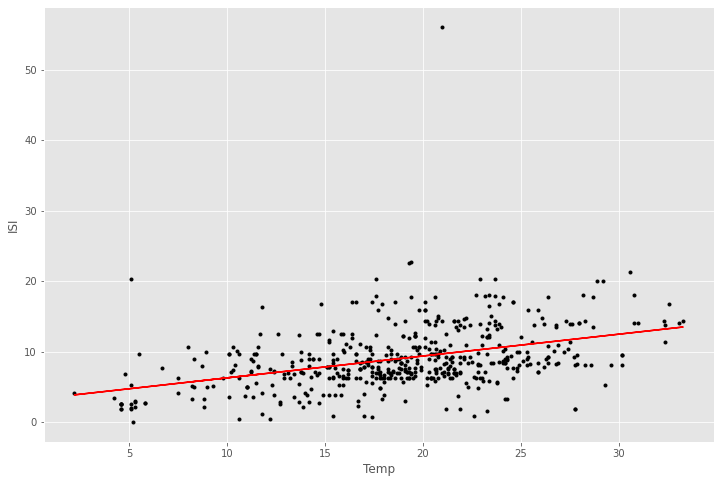

In [127]:
# Plot Temp and ISI and the regression line in red.
plt.plot(fires_df['temp'], fires_df['ISI'], 'k.')
plt.plot(fires_df['temp'], m * fires_df['temp'] + c, 'r-')
plt.xlabel("Temp")
plt.ylabel("ISI")

In [136]:
# Calculating the best m and c.

# Set x, y to temp and ISI
x = fires_df['temp']
y = fires_df['ISI']

# Calculate mean x and mean y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# Dot product of mean-adjusted x and y divided by dot product of mean adjusted x with itself.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)

# Subtract m times average x from average y.
c = y_avg - m * x_avg

# Let's have a look - different values to previous m and c (0.30960203972010575, 3.1735384152908384).
m, c

(0.3096020397201057, 3.1735384152908432)

In [138]:
# Create y from a polynomial in x.
y =  2.0 * x * x + 5.0 * x + 1.0 + np.random.normal(0.0, 1.0, len(x))

In [139]:
# Blindly try the regression - we get answers.
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(76.72560947510556, -572.8792443336564)

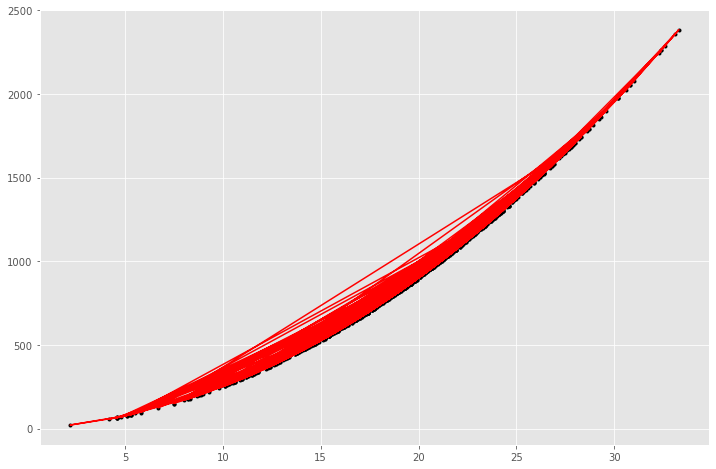

In [142]:
# Create variables with those values.
a, b, c = np.polyfit(x, y, 2)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x + c, 'r-')

### Multiple Linear Regression Analysis 
I will be using only 4 direct weather conditions (temp, RH, wind and rain) to perform the analysis on the [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/Forest+Fires), using [scikit-learn](https://scikit-learn.org/stable/).

In [143]:
# Import linear_model from sklearn.
import sklearn.linear_model as lm

In [144]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [145]:
# Let's use pandas to read a csv file and organise our data.
import pandas as pd

In [146]:
# Load the Forest Fire data set from a URL.
fires = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

In [147]:
fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


$ temp = t(RH) + u(wind) + v(rain) + c $

In [204]:
# Let's pretend we want to do linear regression on these variables to predict temp.
x = fires[['RH', 'wind', 'rain']]

In [205]:
# Here's temp.
y = df['temp']

In [206]:
# Ask our model to fit the data.
m.fit(x, y)

LinearRegression()

In [207]:
# Here's our intercept.
m.intercept_

29.725188987012025

In [208]:
# Here's our coefficients, in order.
m.coef_

array([-0.18752857, -0.64410535,  2.63305102])

In [209]:
# See how good our fit is.
m.score(x, y)

0.3323888282296892

In [210]:
# Calculating the score by hand.
t, u, v = m.coef_
c = m.intercept_

y_avg = y.mean()

u = ((y - (t * x['RH'] + u * x['wind'] + v * x['rain'] + c))**2).sum()
v = ((y - y.mean())**2).sum()

1 - (u/v)

0.3323888282296892

In [211]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     85.14
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           1.02e-44
Time:                        15:01:27   Log-Likelihood:                -1538.0
No. Observations:                 517   AIC:                             3084.
Df Residuals:                     513   BIC:                             3101.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7252      0.747     39.818      0.0

## References
1. DataQuest "Scikit-learn Tutorial: Machine Learning in Python" https://www.dataquest.io/blog/sci-kit-learn-tutorial/

2. UCI provided data-sets for analysis. https://archive.ics.uci.edu/ml/index.php

3. 

***

## End